In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import pickle
from matplotlib_venn import venn3, venn3_circles

In [2]:
folder = "BBBC022"
fh_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/First_hit/"
map_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/First_hit/"
folder_names = ["CellProfiler","Pretrained","Combined_set"] # "Indiv_dataset",
strategies = ["CellProfiler", "ImageNet Pretrained", "Weakly Supervised"]
sphering_params_epoch = ["1e-1", "1e-3", "1e-3_e30"] # "1e-3_e30",
partitions = ["/", "/conv6a/", "/Cells_out/"] # "/Cells_out/conv6a/",
file_names = ["cellprofiler", "efn128_pretrained_conv6a", "efn128_combinedcellsout_conv6a"] #"FH_efn128cellsout_conv6a", 
aggregation_level = "treatment_level"

In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan"] 
high_colors = ["deeppink", "gold", "deepskyblue"]

# First hit results

In [ ]:
first_hits = []
for k in range(len(strategies)):
  df = pd.read_csv(f"{fh_path}{folder_names[k]}{partitions[k]}{file_names[k]}_{sphering_params_epoch[k]}_{aggregation_level}.csv", index_col=0)
  df["Strategy"] = strategies[k]
  first_hits.append(df)
first_hits = pd.concat(first_hits).reset_index()

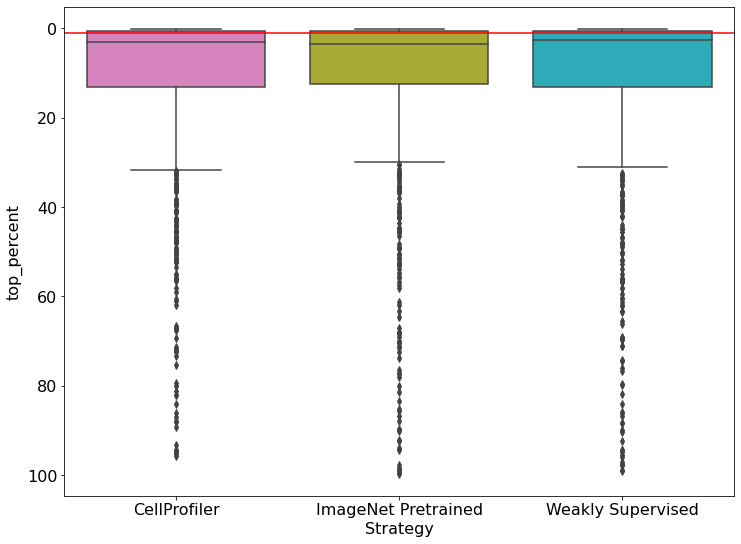

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,9))
g = sb.boxplot(data=first_hits, x="Strategy", y="top_percent", palette=main_colors)
g.invert_yaxis()
plt.axhline(y=1, color='r', linestyle='-')

[(0.0, 5.0)]

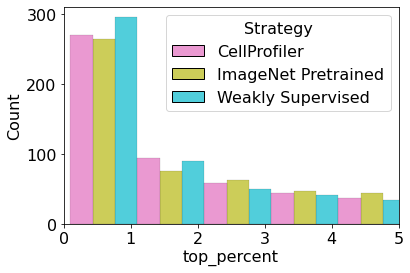

In [ ]:
g = sb.histplot(first_hits, x="top_percent", hue="Strategy", binwidth=1, multiple="dodge", palette=main_colors)
g.set(xlim=(0, 5))

[(1.0, 10.0)]

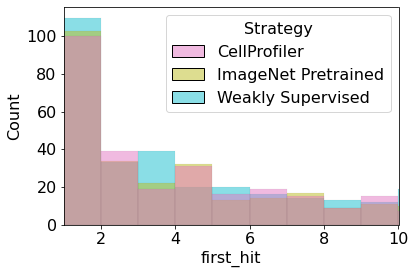

In [ ]:
g = sb.histplot(first_hits, x="first_hit", hue="Strategy", binwidth=1, multiple="layer", palette=main_colors)
g.set(xlim=(1, 10))

,Strategy,index,Compound,Treatment,first_hit,top_percent
0,CellProfiler,263,263,263,263,263
1,ImageNet Pretrained,255,255,255,255,255
2,Weakly Supervised,277,277,277,277,277


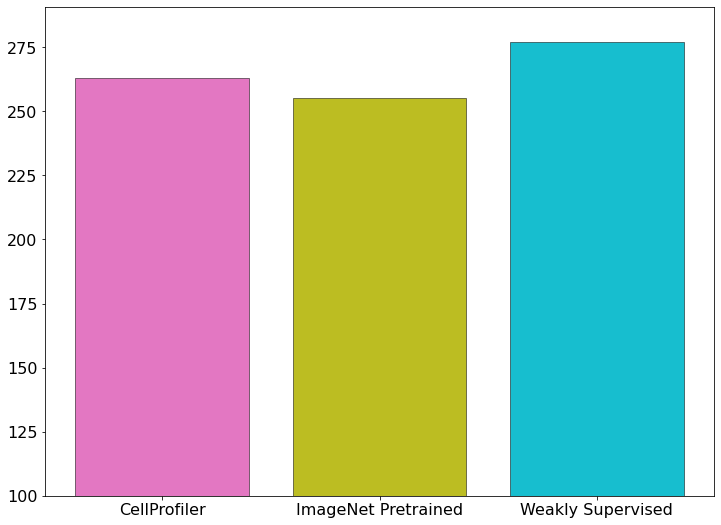

In [ ]:
counts = first_hits[first_hits.top_percent <= 1].groupby("Strategy").count().reset_index()
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,9))
b = plt.bar(counts.Strategy, counts.Compound)
t = ax.set_ylim([100, None])
for k in range(3): 
  b[k].set_color(main_colors[k])
  b[k].set_linewidth(0.5)
  b[k].set_edgecolor('black')
counts

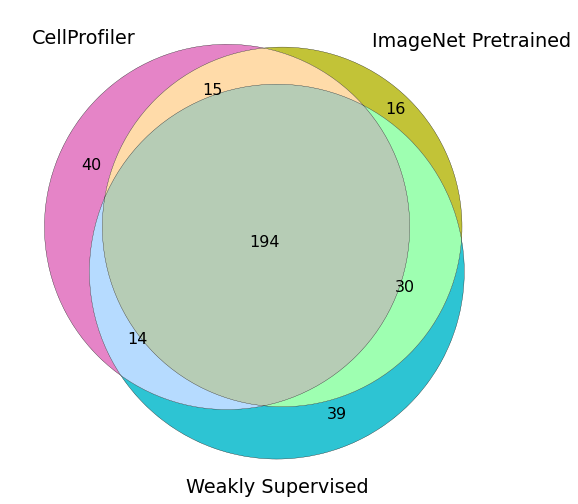

In [ ]:
sets = []
for k in range(len(strategies)):
  s = set(first_hits.query(f"top_percent <= 1. & Strategy == '{strategies[k]}'").Compound)
  sets.append(s)

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,9))
venn3(sets, strategies, set_colors=main_colors, alpha=0.9)
venn3_circles(sets, linewidth=0.3)

# Ranking performance and enrichment analysis

In [ ]:
folder = "BBBC022"
fh_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/mAP_FoE/"
map_path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/mAP_FoE/"

In [ ]:
map_foe = []
for k in range(len(strategies)):
  print(strategies[k])
  df = pd.read_csv(f"{fh_path}{folder_names[k]}{partitions[k]}{file_names[k]}_{sphering_params_epoch[k]}.csv", index_col=0)
  df["Strategy"] = strategies[k]
  map_foe.append(df)
map_foe = pd.concat(map_foe).reset_index()

CellProfiler
ImageNet Pretrained
Weakly Supervised


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


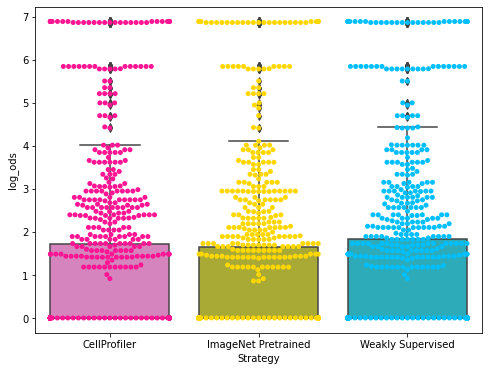

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 10})
map_foe["log_ods"] = np.log(map_foe["ods_ratio"]+1)
g = sb.swarmplot(data=map_foe, x="Strategy", y="log_ods", palette=high_colors)
g = sb.boxplot(data=map_foe, x="Strategy", y="log_ods", palette=main_colors)


In [ ]:
map_foe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           2547 non-null   int64  
 1   Var1            2547 non-null   object 
 2   percentile      2547 non-null   float64
 3   threshold       2547 non-null   float64
 4   ods_ratio       2547 non-null   float64
 5   p-value         2547 non-null   float64
 6   V               2547 non-null   object 
 7   precision_at_k  2547 non-null   float64
 8   pk              2547 non-null   float64
 9   recall_at_k     2547 non-null   float64
 10  rk              2547 non-null   float64
 11  Strategy        2547 non-null   object 
 12  log_ods         2547 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 258.8+ KB


In [ ]:
map_foe.groupby("Strategy").index.count()

Strategy
CellProfiler           849
ImageNet Pretrained    849
Weakly Supervised      849
Name: index, dtype: int64

In [ ]:
import statsmodels.stats.multitest as multi
for s in strategies:
  r,cpv,_,_ = multi.multipletests(map_foe.loc[map_foe.Strategy==s, "p-value"])
  print(s,np.sum(r))

CellProfiler 58
ImageNet Pretrained 59
Weakly Supervised 63


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_results = pd.merge(first_hits, map_foe, left_on=["Compound","Strategy"], right_on=["Var1", "Strategy"]).reset_index()

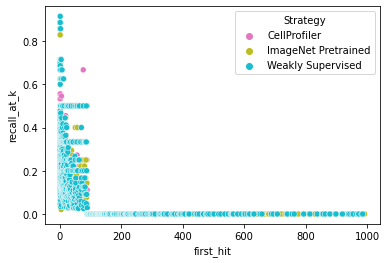

In [ ]:
sb.scatterplot(data=all_results, x="first_hit", y="recall_at_k", hue="Strategy", palette=main_colors)

In [ ]:
trt_index = pd.read_csv(f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/BBBC022_MOA_MATCHES_official.csv")
unique_moa = []
for k,r in trt_index.iterrows():
    moas = r["Metadata_moa.x"].split("|")
    for m in moas:
        unique_moa.append(m)

In [ ]:
print("Initial number of treatment-Unique-MoA combinations:", len(unique_moa))
X = pd.DataFrame(data=unique_moa)
print("Total unique MoAs", len(X[0].unique()))
X["Treatments"] = 1
X = X.groupby(0).count().reset_index()
print("Treatments in MoA classes with more than 1 compound", X.loc[X.Treatments > 1, "Treatments"].sum())
X[X.Treatments > 1]

Initial number of treatment-Unique-MoA combinations: 1168
Total unique MoAs 381
Treatments in MoA classes with more than 1 compound 951


,0,Treatments
0,11-beta hydroxysteroid dehydrogenase inhibitor,2
5,acetylcholine receptor agonist,8
6,acetylcholine receptor antagonist,26
9,acetylcholinesterase inhibitor,11
13,adenosine receptor agonist,2
...,...,...
373,tyrosine kinase inhibitor,3
375,uricosuric blocker,2
376,vasodilator,3
377,vitamin b,3


In [ ]:
all_results.groupby("Strategy").index.count()

Strategy
CellProfiler           849
ImageNet Pretrained    849
Weakly Supervised      849
Name: index, dtype: int64

In [7]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":50.266771283929,"mAP":0.0888006100026258, "First-Hit":263},
                   #{"Strategy":"ImageNet Pretrained","Enrichment":43.563675680369,"mAP":0.0869869028649266, "First-Hit":263},
                   {"Strategy":"ImageNet Pretrained","Enrichment":49.9737816788734,"mAP":0.0902299935449436, "First-Hit":255},
                   #{"Strategy":"WSL - Combined Set Plates Out","Enrichment":51.7086281201131,"mAP":0.0931815207433582, "First-Hit":265},
                   {"Strategy":"WSL - Combined Set Cells Out","Enrichment":53.8468747679774,"mAP":0.0965405983095019, "First-Hit":277},
                   #{"Strategy":"WSL - Individual Set Plates Out","Enrichment":42.2322609379059,"mAP":0.0894057993891929, "First-Hit":259},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":44.6800760615533,"mAP":0.0899599008850135, "First-Hit":256}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,50.266771,0.088801,263
1,ImageNet Pretrained,49.973782,0.090230,255
2,WSL - Combined Set Cells Out,53.846875,0.096541,277
3,WSL - Individual Set Cells Out,44.680076,0.089960,256


In [8]:
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:cyan", "tab:green", "tab:green"]
#main_markers = ['o', 'o', 'D', 'o', 'D', 'o']
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green"]
main_markers = ['o', 'o', 'o', 'o']

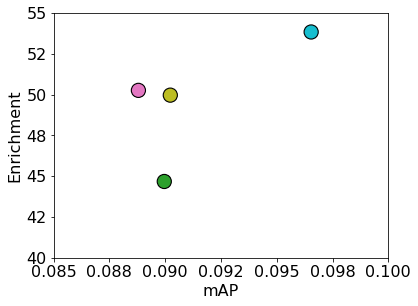

In [9]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(6,4.5))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.085, 0.10])
t = ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
t = ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
t = ax.set_ylim([40, 55])
plt.legend(loc='upper left')
ax.get_legend().remove()

In [ ]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":50.266771283929,"mAP":0.0888006100026258, "First-Hit":263},
                   {"Strategy":"ImageNet Pretrained","Enrichment":49.9737816788734,"mAP":0.0902299935449436, "First-Hit":255},
                   {"Strategy":"WSL - Combined Set Cells Out","Enrichment":53.8468747679774,"mAP":0.0965405983095019, "First-Hit":277},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":44.6800760615533,"mAP":0.0899599008850135, "First-Hit":256},
                  {"Strategy":"WSL - Combined Set Cells Out Masked","Enrichment":58.5262743257576,"mAP":0.0925691389608973, "First-Hit":277}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,50.266771,0.088801,263
1,ImageNet Pretrained,49.973782,0.090230,255
2,WSL - Combined Set Cells Out,53.846875,0.096541,277
3,WSL - Individual Set Cells Out,44.680076,0.089960,256
4,WSL - Combined Set Cells Out Masked,58.526274,0.092569,277


In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:gray"]
main_markers = ['o', 'o', 'o', 'o', 'o']

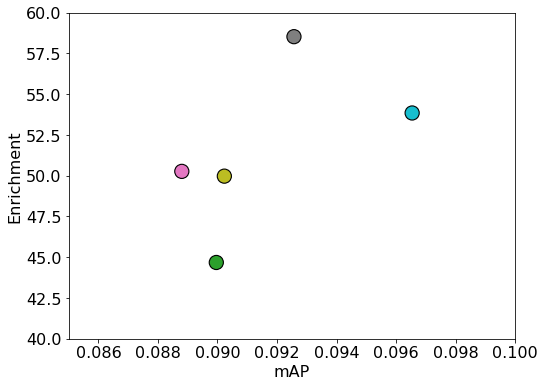

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.085, 0.10])
t = ax.set_ylim([40, 60])
plt.legend(loc='upper left')
ax.get_legend().remove()

In [3]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":50.266771283929,"mAP":0.0888006100026258, "First-Hit":263},
                   #{"Strategy":"ImageNet Pretrained","Enrichment":49.9737816788734,"mAP":0.0902299935449436, "First-Hit":255},
                   #{"Strategy":"WSL - Combined Set Plates Out","Enrichment":51.7086281201131,"mAP":0.0931815207433582, "First-Hit":265},
                   #{"Strategy":"WSL - Combined Set Cells Out","Enrichment":53.8468747679774,"mAP":0.0965405983095019, "First-Hit":277},
                   #{"Strategy":"WSL - Individual Set Plates Out","Enrichment":42.2322609379059,"mAP":0.0894057993891929, "First-Hit":259},
                   {"Strategy":"WSL - Individual Set Cells Out","Enrichment":44.6800760615533,"mAP":0.0899599008850135, "First-Hit":256},
                   #{"Strategy":"WSL - Individual Strong Set Plates Out","Enrichment":40.0979788870569,"mAP":0.088305445065441, "First-Hit":0},
                   {"Strategy":"WSL - Individual Strong Set Cells Out","Enrichment":43.0796730704644,"mAP":0.088416260349176, "First-Hit":0},
                   #{"Strategy":"WSL - Individual Median Set Plates Out","Enrichment":41.2808792883399,"mAP":0.085350596991685, "First-Hit":0},
                   {"Strategy":"WSL - Individual Median Set Cells Out","Enrichment":41.8192083307588,"mAP":0.0852511369677985, "First-Hit":0},
                   #{"Strategy":"WSL - Individual Weak Set Plates Out","Enrichment":32.3424932737995,"mAP":0.0777094711571676, "First-Hit":0},
                   {"Strategy":"WSL - Individual Weak Set Cells Out","Enrichment":36.8403740285745,"mAP":0.0791428565441805, "First-Hit":0}
                    ])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,50.266771,0.088801,263
1,WSL - Individual Set Cells Out,44.680076,0.089960,256
2,WSL - Individual Strong Set Cells Out,43.079673,0.088416,0
3,WSL - Individual Median Set Cells Out,41.819208,0.085251,0
4,WSL - Individual Weak Set Cells Out,36.840374,0.079143,0


In [4]:
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:cyan", "tab:green", "tab:green", "tab:red", "tab:red", "tab:orange", "tab:orange", "tab:blue", "tab:blue"]
#main_markers = ['o', 'o', 'D', 'o', 'D', 'o', 'D', 'o', 'D', 'o', 'D', 'o']
#main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:red",  "tab:orange", "tab:blue"]
#main_markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o']
main_colors = ["tab:pink", "tab:green", "tab:red",  "tab:orange", "tab:blue"]
main_markers = ['o', 'o', 'o', 'o', 'o']

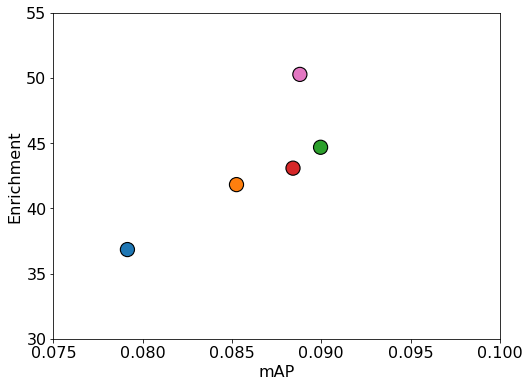

In [5]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.075, 0.10])
t = ax.set_ylim([30, 55])
plt.legend(loc='upper left')
ax.get_legend().remove()

In [ ]:
full_results = pd.merge(all_results, trt_index, left_on=["Compound"], right_on=["Var1"])
full_results = full_results.assign(var1=full_results['Metadata_moa.x'].str.split('|')).explode('var1')
full_results.reset_index(inplace=True, drop = True)
full_results.rename(columns={"var1": "Single_MoA"}, inplace=True)
full_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3048 non-null   int64  
 1   index_x         3048 non-null   int64  
 2   Compound        3048 non-null   object 
 3   Treatment       3048 non-null   object 
 4   first_hit       3048 non-null   int64  
 5   top_percent     3048 non-null   float64
 6   Strategy        3048 non-null   object 
 7   index_y         3048 non-null   int64  
 8   Var1_x          3048 non-null   object 
 9   percentile      3048 non-null   float64
 10  threshold       3048 non-null   float64
 11  ods_ratio       3048 non-null   float64
 12  p-value         3048 non-null   float64
 13  V               3048 non-null   object 
 14  precision_at_k  3048 non-null   float64
 15  pk              3048 non-null   float64
 16  recall_at_k     3048 non-null   float64
 17  rk              3048 non-null   f

In [ ]:
stats = full_results.groupby(["Single_MoA", "Strategy"])[["first_hit", "top_percent","ods_ratio","precision_at_k"]].mean().reset_index()
counts = full_results.groupby(["Single_MoA", "Strategy"])["first_hit"].count().reset_index()
stats = pd.merge(stats, counts.rename({"first_hit":"counts"}, axis=1), on=["Single_MoA","Strategy"])

In [ ]:
len(stats["Single_MoA"].unique())

231

In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan"] 
high_colors = ["deeppink", "gold", "deepskyblue"]

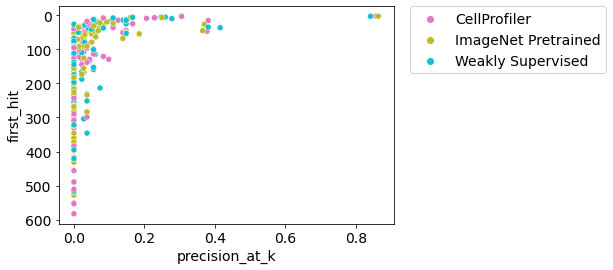

In [ ]:
g = sb.scatterplot(data=stats[stats.counts >= 3], x="precision_at_k", y="first_hit", hue="Strategy", palette=main_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.invert_yaxis()

<BarContainer object of 231 artists>

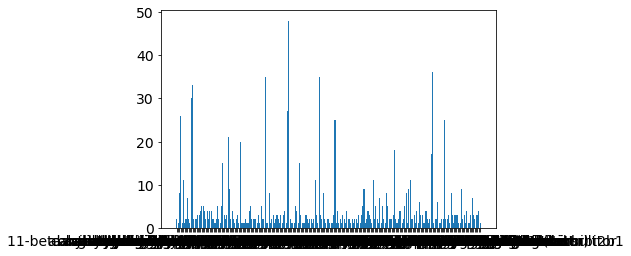

In [ ]:
plt.bar(stats[stats.Strategy == "CellProfiler"]["Single_MoA"], stats[stats.Strategy == "CellProfiler"].counts)

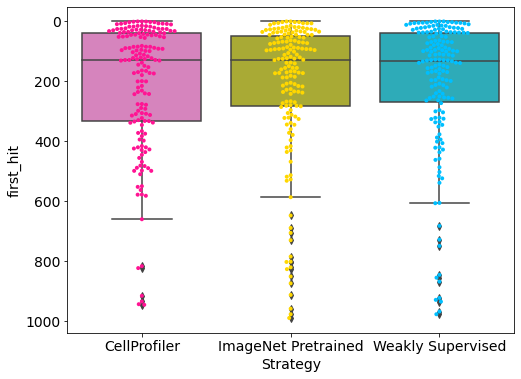

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="first_hit", size=4, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="first_hit", palette=main_colors)
g.invert_yaxis()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


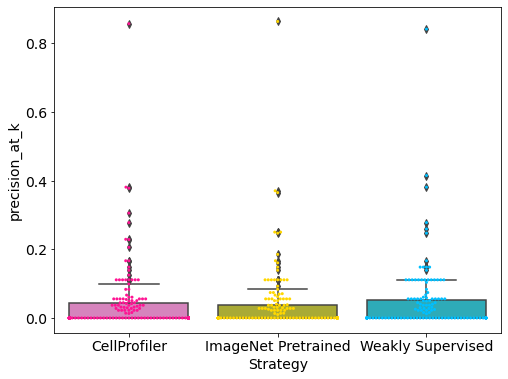

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="precision_at_k", size=3, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="precision_at_k", palette=main_colors)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


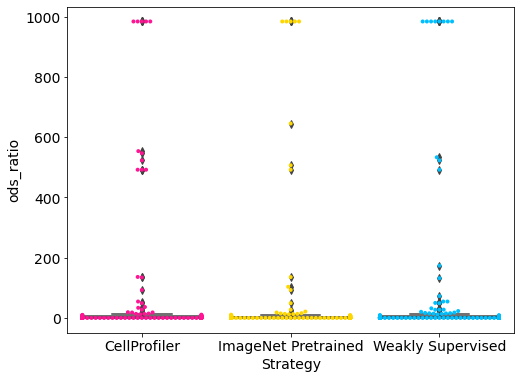

In [ ]:
plt.figure(figsize=(8,6))
g = sb.swarmplot(data=stats[stats.counts >= 2], x="Strategy", y="ods_ratio", size=4, palette=high_colors)
g = sb.boxplot(data=stats[stats.counts >= 2], x="Strategy", y="ods_ratio", palette=main_colors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 0.24)

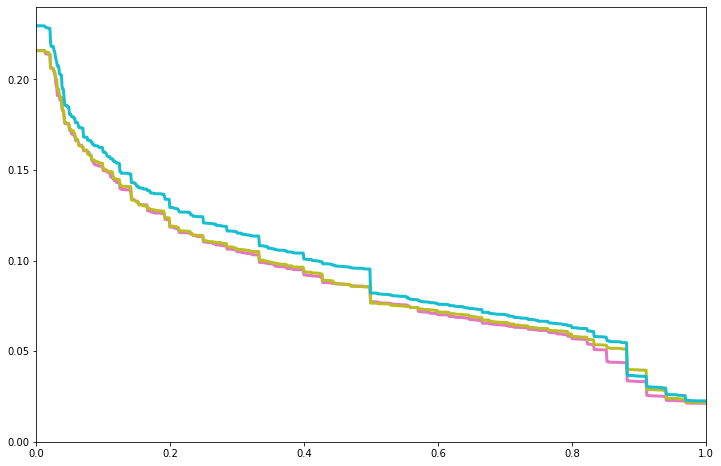

In [ ]:
with open(f"{map_path}{folder_names[0]}{partitions[0]}{file_names[0]}_{sphering_params_epoch[0]}.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file) 

with open(f"{map_path}{folder_names[1]}{partitions[1]}{file_names[1]}_{sphering_params_epoch[1]}.pkl", "rb") as in_file:
    en_results = pickle.load(in_file) 

with open(f"{map_path}{folder_names[2]}{partitions[2]}{file_names[2]}_{sphering_params_epoch[2]}.pkl", "rb") as in_file:
    en2_results = pickle.load(in_file)

plt.figure(figsize=(12,8))
sb.lineplot(cp_results["recall_axis"], cp_results["precision_axis"], color=main_colors[0], linewidth = 3)
sb.lineplot(en_results["recall_axis"], en_results["precision_axis"], color=main_colors[1], linewidth = 3)
g = sb.lineplot(en2_results["recall_axis"], en2_results["precision_axis"], color=main_colors[2], linewidth = 3)
g.set_xlim(0,1.)
g.set_ylim(0,0.24)
#plt.gca().legend(('CellProfiler', 'ImageNet pretrained', 'Trained on Cell Painting'),fontsize=16)

In [ ]:
cp_results.keys()

dict_keys(['ranking', 'precision_at_k', 'recall', 'avg_prec@top1', 'avg_recall@top1', 'recall_axis', 'precision_axis', 'mean_average_precision', 'reference_library_size', 'number_of_queries'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

(0.07, 0.11)

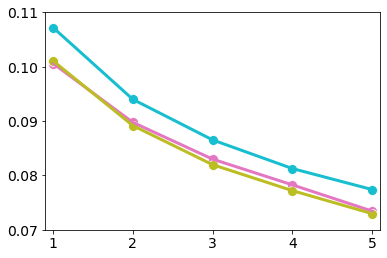

In [ ]:
start, stop = 0,5
plt.rcParams.update({'font.size': 14})
sb.lineplot(range(start+1,stop+1), cp_results["precision_at_k"][start:stop], color=main_colors[0], linewidth = 3)
sb.scatterplot(range(start+1,stop+1), cp_results["precision_at_k"][start:stop], color=main_colors[0], s=100)

sb.lineplot(range(start+1,stop+1), en_results["precision_at_k"][start:stop], color=main_colors[1], linewidth = 3)
sb.scatterplot(range(start+1,stop+1), en_results["precision_at_k"][start:stop], color=main_colors[1], s=100)

g = sb.lineplot(range(start+1,stop+1), en2_results["precision_at_k"][start:stop], color=main_colors[2], linewidth = 3)
g = sb.scatterplot(range(start+1,stop+1), en2_results["precision_at_k"][start:stop], color=main_colors[2], s=100)
g.set_xlim(0.9,stop+0.1)
g.set_ylim(0.07,0.11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.045, 0.1)

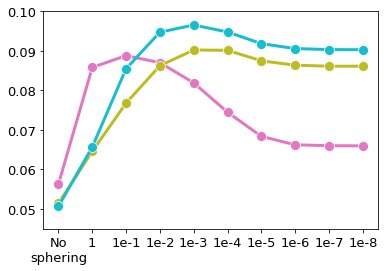

In [ ]:
sphering_params_comparison = ['no', '1', '1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']
sphering_params_comparison_axis = ['No' + "\n" + 'sphering', '1', '1e-1', '1e-2', '1e-3', '1e-4', '1e-5', '1e-6', '1e-7', '1e-8']

cellprofiler_map = []
imagenet_map = []
combinedset_map = []

for sp in range(len(sphering_params_comparison)):
  with open(f"{map_path}{folder_names[0]}{partitions[0]}{file_names[0]}_{sphering_params_comparison[sp]}.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file)
    cellprofiler_map.append(cp_results['mean_average_precision'])

  with open(f"{map_path}{folder_names[1]}{partitions[1]}{file_names[1]}_{sphering_params_comparison[sp]}.pkl", "rb") as in_file:
     en_results = pickle.load(in_file)
     imagenet_map.append(en_results['mean_average_precision'])

  with open(f"{map_path}{folder_names[2]}{partitions[2]}{file_names[2]}_{sphering_params_comparison[sp]}_e30.pkl", "rb") as in_file:
      en2_results = pickle.load(in_file)
      combinedset_map.append(en2_results['mean_average_precision'])
      

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 13})
sb.lineplot(sphering_params_comparison_axis, cellprofiler_map, color=main_colors[0], linewidth = 3, marker='o', markersize=10)
sb.lineplot(sphering_params_comparison_axis, imagenet_map, color=main_colors[1], linewidth = 3, marker='o', markersize=10)
g = sb.lineplot(sphering_params_comparison_axis, combinedset_map, color=main_colors[2], linewidth = 3, marker='o', markersize=10)
g.set_ylim(0.045,0.1)
#plt.gca().legend(('CellProfiler', 'ImageNet pretrained', 'Trained on Cell Painting'),fontsize=16)

In [ ]:
df = pd.DataFrame([{"Strategy":"CellProfiler","Enrichment":50.266771283929,"mAP":0.0888006100026258, "First-Hit":263},
                   {"Strategy":"ImageNet Pretrained","Enrichment":49.9737816788734,"mAP":0.0902299935449436, "First-Hit":255},
                   {"Strategy":"WSL - Combined Set Plates Out","Enrichment":51.7086281201131,"mAP":0.0931815207433582, "First-Hit":265},
                   {"Strategy":"WSL - Individual Set Plates Out","Enrichment":42.2322609379059,"mAP":0.0894057993891929, "First-Hit":259},
                   {"Strategy":"WSL - Individual Set Strong Treatments Plates Out","Enrichment":48.3761515008426,"mAP":0.0924346482815615, "First-Hit":275}])
df

,Strategy,Enrichment,mAP,First-Hit
0,CellProfiler,50.266771,0.088801,263
1,ImageNet Pretrained,49.973782,0.090230,255
2,WSL - Combined Set Plates Out,51.708628,0.093182,265
3,WSL - Individual Set Plates Out,42.232261,0.089406,259
4,WSL - Individual Set Strong Treatments Plates Out,48.376152,0.092435,275


In [ ]:
main_colors = ["tab:pink","tab:olive","tab:cyan", "tab:green", "tab:blue"]
main_markers = ['o', 'o', 'D', 'D', 'D']

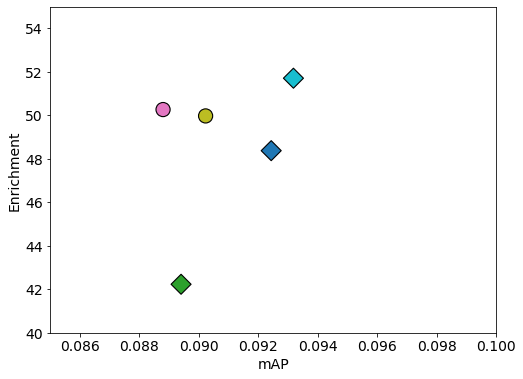

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8,6))
sb.scatterplot(data=df, x="mAP", y="Enrichment", hue="Strategy", s=200, edgecolor="black", palette=main_colors, style = 'Strategy', markers = main_markers)
t = ax.set_xlim([0.085, 0.10])
t = ax.set_ylim([40, 55])
plt.legend(loc='upper left')
ax.get_legend().remove()